In [1]:
import os
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import linregress
import graph_tool.all as gt
from global_funcs2 import *

In [14]:
file = "global_variables2/N_100_global.npy"
n100 = np.load(file, allow_pickle=True).item()
n100

{'1': {'k0': {'Fisher': {'tau1.0': {'Mean_degree': 49.32,
     'MR_coefficient': 49.64233576642336,
     'Neigh_degree': 49.32,
     'Mixing_exponent': (1.0, 0.0),
     'Global_clustering': (0.9898254734496844, 8.173725200014691e-05),
     'Assortativity': (1.0, 0.0),
     'Modularity': 0.4598757209977839,
     'Avg_path_length': nan},
    'tau1.5': {'Mean_degree': 49.32,
     'MR_coefficient': 49.64233576642336,
     'Neigh_degree': 49.32,
     'Mixing_exponent': (1.0, 0.0),
     'Global_clustering': (0.9898254734496844, 8.173725200014691e-05),
     'Assortativity': (1.0, 0.0),
     'Modularity': 0.48710639884916623,
     'Avg_path_length': nan},
    'tau2.0': {'Mean_degree': 49.32,
     'MR_coefficient': 49.64233576642336,
     'Neigh_degree': 49.32,
     'Mixing_exponent': (1.0, 0.0),
     'Global_clustering': (0.9898254734496844, 8.173725200014691e-05),
     'Assortativity': (1.0, 0.0),
     'Modularity': 0.47785495060478633,
     'Avg_path_length': nan},
    'tau2.5': {'Mean_degre

In [37]:
keys = ['cane','pera']
animals = ['gatto','cane','elefante']
fruits = ['arancia','mela','pera']
positions = [i for i, k in enumerate(keys) if k in animals]
positions

[0]

In [45]:
def explore_dict(global_dict, keys):
    # Function to easily access global variables.
    # 'keys' is an array of strings containing ORDERED keys from bottom to top.
    # Example: keys = ['Neigh_degree','k0'] is ok but the opposite is not.
    numbers = list(global_dict.keys())
    ks = list(global_dict['1'].keys())
    methods = list(global_dict['1']['k0'].keys())
    taus = list(global_dict['1']['k0']['Fisher'].keys())
    ps = list(global_dict['1']['k0']['Naive'].keys())
    measures = list(global_dict['1']['k0']['Fisher']['tau1.0'].keys())

    out_dict = global_dict
    for key in keys:
        if key in measures:
            out_dict = {n:  {k: {m: {t: out_dict[n][k][m][t][key] for t in taus} for m in ['Fisher','FisherRMT']} | {m: {p: out_dict[n][k][m][p][key] for p in ps} for m in ['Naive']} for k in ks} for n in numbers}
        elif key in ps:
            out_dict = {n:  {k: {m: out_dict[n][k][m][key] for m in ['Naive']} for k in ks} for n in numbers}
        elif key in taus:
            out_dict = {n:  {k: {m: out_dict[n][k][m][key] for m in ['Fisher','FisherRMT']} for k in ks} for n in numbers}
        elif key in methods:
            out_dict = {n:  {k: out_dict[n][k][key] for k in ks} for n in numbers}
        elif key in ks:
            out_dict = {n: out_dict[n][key] for n in numbers}
        elif key in numbers:
            out_dict = out_dict[key]
        else:
            return 'Wrong key input.'
    return out_dict

explore_dict(n100,['Avg_path_length','Fisher'])

{'1': {'k0': {'tau1.0': nan, 'tau1.5': nan, 'tau2.0': nan, 'tau2.5': nan},
  'k10': {'tau1.0': 1.8723232323232324,
   'tau1.5': 1.8723232323232324,
   'tau2.0': 1.9056565656565656,
   'tau2.5': 1.9323232323232322},
  'k15': {'tau1.0': nan, 'tau1.5': nan, 'tau2.0': nan, 'tau2.5': nan},
  'k25': {'tau1.0': nan, 'tau1.5': nan, 'tau2.0': nan, 'tau2.5': nan},
  'k50': {'tau1.0': nan, 'tau1.5': nan, 'tau2.0': nan, 'tau2.5': nan}},
 '2': {'k0': {'tau1.0': nan, 'tau1.5': nan, 'tau2.0': nan, 'tau2.5': nan},
  'k10': {'tau1.0': nan, 'tau1.5': nan, 'tau2.0': nan, 'tau2.5': nan},
  'k15': {'tau1.0': nan, 'tau1.5': nan, 'tau2.0': nan, 'tau2.5': nan},
  'k25': {'tau1.0': 1.0, 'tau1.5': 1.0, 'tau2.0': 1.0, 'tau2.5': 1.0},
  'k50': {'tau1.0': 1.0, 'tau1.5': 1.0, 'tau2.0': 1.0, 'tau2.5': 1.0}},
 '3': {'k0': {'tau1.0': nan, 'tau1.5': nan, 'tau2.0': nan, 'tau2.5': nan},
  'k10': {'tau1.0': 1.8440404040404041,
   'tau1.5': 1.8440404040404041,
   'tau2.0': 1.8440404040404041,
   'tau2.5': 1.844040404040404

In [2]:
# path = "/mnt/corr_data/kuramoto/filtered_corr/N500/Noiseless/Fisher/tau1.0/kuramoto_k0_500_1.csv"
path = "/mnt/corr_data/kuramoto/filtered_corr/N100/Noiseless"
graphs_folder = os.path.join('..', 'graphs')

In [3]:
def build_dict():
    N_dict = {}
    for i in range(25):
        N_dict[f"{i+1}"] = {}
        for k in [0,10,15,25,50]:
            N_dict[f"{i+1}"][f"k{k}"] = {}
            N_dict[f"{i+1}"][f"k{k}"]["Fisher"] = {}
            N_dict[f"{i+1}"][f"k{k}"]["FisherRMT"] = {}
            N_dict[f"{i+1}"][f"k{k}"]["Naive"] = {}
            for tau in ["tau1.0", "tau1.5", "tau2.0", "tau2.5"]:
                N_dict[f"{i+1}"][f"k{k}"]["Fisher"][tau] = {}
                N_dict[f"{i+1}"][f"k{k}"]["FisherRMT"][tau] = {}
            for p in ["p0.1", "p0.15", "p0.2", "p0.25"]:
                N_dict[f"{i+1}"][f"k{k}"]["Naive"][p] = {}

    return N_dict

In [4]:
def extract_file_information(subdir, file):
    base_name = os.path.splitext(file)[0]
    _, k_str, n_str, i_str = base_name.split('_')
    thresh = subdir.split('/')[-1]
    method = subdir.split('/')[-2]
    
    return(i_str, k_str, method, thresh)

# graph-tools

In [3]:
def mat2edgelist(csv_matrix):
    # function to convert a matrix saved in csv format into an edge list
    A = np.loadtxt(csv_matrix,delimiter=",")
    for i in range(len(A)):
        A[i,i] = 0
    edge_list = []
    for source in range(len(A)):
        for target in np.nonzero(A[source,:])[0]:
            edge_list.append((source,target))
    return edge_list


In [4]:
# make graph from correlation matrix
path= f"/mnt/corr_data/kuramoto/filtered_corr/N100/Noiseless/Fisher/tau2.5/kuramoto_k10_100_1.csv"
edge_list = mat2edgelist(path)
g = gt.Graph()
g.add_edge_list(edge_list)
g

<Graph object, directed, with 100 vertices and 5528 edges, at 0x7f53d4296de0>

In [5]:
expo = knn_scaling_exponent(g)
knn = average_neighbor_degree(g)
avg_knn = np.mean(list(knn.values()))
print(expo)
print(avg_knn)

(1.0522313983743445, 0.09731379211043148)
55.299795594396436


In [6]:
mdl_state = gt.minimize_blockmodel_dl(g)
b = mdl_state.get_blocks()
mod = gt.modularity(g,b)
mod

0.289791177554709

In [20]:
def compute_global_variables(g, glob_dict):

    #Adj matrix
    A = gt.adjacency(g).todense()
    
    #Mean degree
    degree_sequence = g.get_out_degrees(g.get_vertices())
    glob_dict['Mean_degree'] = np.mean(degree_sequence)
    
    #Molloy-Reed coefficient
    seq2 = np.array(degree_sequence)**2
    glob_dict['MR_coefficient'] = np.mean(seq2)/np.mean(degree_sequence)
    
    #Avg. neigh. degree
    n_deg = average_neighbor_degree(A)
    glob_dict['Neigh_degree'] = np.mean(n_deg)

    #Mixing exponent
    expo = knn_scaling_exponent(A)
    glob_dict['Mixing_exponent'] = expo
    
    #Global clustering
    clust = gt.global_clustering(g)
    glob_dict['Global_clustering'] = clust

    #Assortativity
    assort = gt.assortativity(g,"in")
    glob_dict['Assortativity'] = assort

    #Modularity via minimum description length
    mdl_state = gt.minimize_blockmodel_dl(g)
    b = mdl.get_blocks()
    mod = gt.modularity(g,b)
    glob_dict['Modularity'] = mod

    #Avg. path length
    glob_dict['Avg_path_length'] = avg_shortest_path(g)
    
    return glob_dict

In [ ]:
def avg_shortest_path(g):
    nodes = g.get_vertices()
    n = len(nodes)
    lengths = []
    for source in nodes:
        targets = np.delete(nodes,source)
        for target in targets:
            vlist, elist = gt.shortest_path(g,g.vertex(source),g.vertex(target))
            lengths.append(len(elist))
            if 0 in lengths:
                return np.nan
    avg_l = np.sum(lengths)/(n*(n - 1))
    return avg_l
        

# networkx

In [3]:
def knn_scaling_exponent(G):
    # Step 1: Compute node degrees
    degrees = dict(G.degree())
    
    # Step 2: Compute the average neighbor degree for each node
    avg_neighbor_degree = nx.average_neighbor_degree(G)
    
    # Step 3: Group the <knn> by degree k
    degree_knn = {}
    
    for node, degree in degrees.items():
        knn = avg_neighbor_degree[node]
        
        if degree not in degree_knn:
            degree_knn[degree] = []
        
        degree_knn[degree].append(knn)
    
    # Step 4: Calculate the average <knn> for each degree k
    avg_knn_by_degree = {k: np.mean(knns) for k, knns in degree_knn.items()}
    
    # Sort the data by degree
    sorted_degrees = np.array(sorted(avg_knn_by_degree.keys()))
    sorted_knns = np.array([avg_knn_by_degree[k] for k in sorted_degrees])
    
    # Step 5: Filter degrees greater than zero to avoid log(0)
    valid_indices = sorted_degrees > 0
    sorted_degrees = sorted_degrees[valid_indices]
    sorted_knns = sorted_knns[valid_indices]
    
    # Step 6: Log-transform the data
    log_degrees = np.log(sorted_degrees)
    log_knns = np.log(sorted_knns)
    
    # Step 7: Perform linear regression to fit log(knn) = alpha * log(k) + C
    slope, intercept, r_value, p_value, std_err = linregress(log_degrees, log_knns)
    
    #print(f"Scaling exponent (alpha): {slope:.4f}")
    #print(f"R-squared: {r_value**2:.4f}")
    
    return slope#, r_value**2

In [49]:
def average_neighbor_degree(A):
    avg_n = []
    for i in range(len(A)):
        neig_degree = 0
        N_i = np.nonzero(A[i,:])[0]
        for j in N_i:
            neig_degree += np.sum(A[j,:])
        avg_n.append(neig_degree/len(N_i))
    return np.mean(avg_n)

In [50]:
n_deg = nx.average_neighbor_degree(G_naive)
print(average_neighbor_degree(A_naive), np.mean(list(n_deg.values())))

138.59372497356478 138.59372497356478


In [6]:
def compute_global_variables(G):
    glob_dict = {}
    #Mean degree
    degree_sequence = [d for n, d in G.degree()]
    glob_dict['Mean_degree'] = np.mean(degree_sequence)
    
    #Molloy-Reed coefficient
    seq2 = np.array(degree_sequence)**2
    glob_dict['MR_coefficient'] = np.mean(seq2)/np.mean(degree_sequence)
    
    #Global clustering
    clust = nx.average_clustering(G)
    glob_dict['Global_clustering'] = clust

    #Modularity (Louvian)
    comms = nx.community.louvain_communities(G)
    glob_dict['L_modularity'] = nx.community.modularity(G, comms)

    #Mixing exponent
    expo = knn_scaling_exponent(G)
    glob_dict['Mixing_exponent'] = expo

    #Avg. path length
    #check if graph is connected
    if nx.is_connected(G):
        path_l = nx.average_shortest_path_length(G)
        glob_dict['Path_length'] = path_l
        glob_dict['Connected'] = True
    else:
        glob_dict['Connected'] = False
        glob_dict['Path_length'] = float("nan")

    #Avg. neigh. degree
    n_deg = nx.average_neighbor_degree(G)
    glob_dict['Neigh_degree'] = np.mean(list(n_deg.values()))

    return glob_dict

In [13]:
N_500 = build_dict()

In [15]:
idx, k, method, thresh = extract_file_information(subdir, file)
#N_500[idx][k][method][thresh] = {'a' : 1}
a = N_500[idx][k][method][thresh]

In [ ]:
for subdir, dirs, files in os.walk(path):
    for file in files:
        print(f"{file}", end='\r')
        idx, k, method, thresh = extract_file_information(subdir, file)
        #load correlation matrix and convert to adjacency matrix
        C = np.loadtxt(os.path.join(subdir,file), delimiter=",")
        A = np.zeros(np.shape(C))
        A[np.where(np.abs(C) > 0.)] = 1.
        #create graph
        G = nx.from_numpy_array(A, edge_attr = None)

        #Fill the appropriate dictionary entry with the gloal variables
        file_dict = N_500[idx][k][method][thresh]
        N_500[idx][k][method][thresh] = compute_global_variables(G, file_dict)
#Save the dictionary
np.save("N_500_global.npy", N_500)

In [4]:
# Load
N_500 = np.load('global_variables/N_500_global.npy',allow_pickle='TRUE').item()

In [5]:
N_500.keys()

dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25'])

In [10]:
N_500['13']['k50']

{'Fisher': {'tau1.0': {'Mean_degree': np.float64(501.0),
   'MR_coefficient': np.float64(501.0),
   'Global_clustering': 1.0,
   'L_modularity': 0.001992015968063896,
   'Mixing_exponent': np.float64(nan),
   'Path_length': 1.0,
   'Connected': True,
   'Neigh_degree': np.float64(500.0)},
  'tau1.5': {'Mean_degree': np.float64(501.0),
   'MR_coefficient': np.float64(501.0),
   'Global_clustering': 1.0,
   'L_modularity': 0.001992015968063896,
   'Mixing_exponent': np.float64(nan),
   'Path_length': 1.0,
   'Connected': True,
   'Neigh_degree': np.float64(500.0)},
  'tau2.0': {'Mean_degree': np.float64(501.0),
   'MR_coefficient': np.float64(501.0),
   'Global_clustering': 1.0,
   'L_modularity': 0.001992015968063896,
   'Mixing_exponent': np.float64(nan),
   'Path_length': 1.0,
   'Connected': True,
   'Neigh_degree': np.float64(500.0)},
  'tau2.5': {'Mean_degree': np.float64(501.0),
   'MR_coefficient': np.float64(501.0),
   'Global_clustering': 1.0,
   'L_modularity': 0.0019920159680

## Trash

In [17]:
path_n = "/mnt/corr_data/kuramoto/filtered_corr/N500/Noiseless/Naive/p0.1"
path_f = "/mnt/corr_data/kuramoto/filtered_corr/N500/Noiseless/Fisher/tau1.0"
file = "kuramoto_k0_500_1.csv"

C_naive = np.loadtxt(os.path.join(path_n,file), delimiter=",")
C_RMT = np.loadtxt(os.path.join(path_f,file), delimiter=",")

In [18]:
C_naive.size * C_naive.itemsize

2000000

In [20]:
A = A_naive

In [43]:
A_naive = np.zeros(np.shape(C_naive))
A_naive[np.where(np.abs(C_naive) > 0.)] = 1.
G_naive = nx.from_numpy_array(A_naive, edge_attr = None)
A_RMT = np.zeros(np.shape(C_RMT))
A_RMT[np.where(np.abs(C_RMT) > 0.)] = 1.
G_RMT = nx.from_numpy_array(A_RMT, edge_attr = None)

base_name = os.path.splitext(file)[0]  # remove .gml extension
_, k_str, n_str, i_str = base_name.split('_')
n = int(n_str)
i = int(i_str)
# Load the original graph
file_path_in = os.path.join(graphs_folder, "graph_{}_{}.gml".format(n,i))
G = nx.read_gml(file_path_in)
#A_original = nx.adjacency_matrix(G).toarray()

#Global clustering
clus_orig = nx.average_clustering(G)
clus_naive = nx.average_clustering(G_naive)
clus_RMT = nx.average_clustering(G_RMT)

In [27]:
print(clus_orig, clus_naive, clus_RMT)

0.020933147485469462 0.0 1.0


In [11]:
ass_orig = nx.average_neighbor_degree(G)
ass_naive = nx.average_neighbor_degree(G_naive)
ass_RMT = nx.average_neighbor_degree(G_RMT)

In [18]:
np.mean(list(ass_orig.values()))

np.float64(9.948416760200583)

In [33]:
nx.is_connected(G)

True

In [34]:
#shortest path length
path_l_orig = nx.average_shortest_path_length(G)
path_l_naive = nx.average_shortest_path_length(G_naive)
#path_l_RMT = nx.average_shortest_path_length(G_RMT)

In [35]:
print(path_l_orig, path_l_naive)

3.0743486973947896 2.0335390781563127


In [36]:
#FOR DISCONNECTED GRAPHS
for C in (G_RMT.subgraph(c).copy() for c in nx.connected_components(G_RMT)):
    print(nx.average_shortest_path_length(C))

1.0
1.0


In [35]:
#LOUVAIN MODULARITY
comms = nx.community.louvain_communities(G)#, seed=123)
print(nx.community.modularity(G, comms))
comms = nx.community.louvain_communities(G_naive)#, seed=123)
print(nx.community.modularity(G_naive, comms))

0.3022934794435502
0.09859531735318497


In [40]:
#Mean degree
degree_sequence = [d for n, d in G.degree()]
print(np.mean(degree_sequence))
degree_sequence_naive = [d for n, d in G_naive.degree()]
print(np.mean(degree_sequence))

#Molloy reed coefficient
seq2 = np.array(degree_sequence)**2
print(np.mean(seq2)/np.mean(degree_sequence))
seq2_naive = np.array(degree_sequence_naive)**2
print(np.mean(seq2_naive)/np.mean(degree_sequence_naive))

8.944
8.944
9.969141323792487
135.30005849764288


In [28]:
def knn_scaling_exponent(G):
    # Step 1: Compute node degrees
    degrees = dict(G.degree())
    
    # Step 2: Compute the average neighbor degree for each node
    avg_neighbor_degree = nx.average_neighbor_degree(G)
    
    # Step 3: Group the <knn> by degree k
    degree_knn = {}
    
    for node, degree in degrees.items():
        knn = avg_neighbor_degree[node]
        
        if degree not in degree_knn:
            degree_knn[degree] = []
        
        degree_knn[degree].append(knn)
    
    # Step 4: Calculate the average <knn> for each degree k
    avg_knn_by_degree = {k: np.mean(knns) for k, knns in degree_knn.items()}
    
    # Sort the data by degree
    sorted_degrees = np.array(sorted(avg_knn_by_degree.keys()))
    sorted_knns = np.array([avg_knn_by_degree[k] for k in sorted_degrees])
    
    # Step 5: Filter degrees greater than zero to avoid log(0)
    valid_indices = sorted_degrees > 0
    sorted_degrees = sorted_degrees[valid_indices]
    sorted_knns = sorted_knns[valid_indices]
    
    # Step 6: Log-transform the data
    log_degrees = np.log(sorted_degrees)
    log_knns = np.log(sorted_knns)
    
    # Step 7: Perform linear regression to fit log(knn) = alpha * log(k) + C
    slope, intercept, r_value, p_value, std_err = linregress(log_degrees, log_knns)
    
    print(f"Scaling exponent (alpha): {slope:.4f}")
    print(f"R-squared: {r_value**2:.4f}")
    
    return slope, r_value**2

knn_scaling_exponent(G)
knn_scaling_exponent(G_naive)
knn_scaling_exponent(G_RMT)

Scaling exponent (alpha): -0.0602
R-squared: 0.3414
Scaling exponent (alpha): -0.4567
R-squared: 0.6839
Scaling exponent (alpha): 0.8853
R-squared: 0.8786


(np.float64(0.8853233401943404), np.float64(0.8785523653733444))

In [16]:
A_naive

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [2]:
# Folder containing the CSV files
folder_path = 'corr_matrix'

# List to store NumPy arrays
matrix_list = []

# Iterate over each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        # Load the CSV file into a NumPy array
        matrix = np.loadtxt(file_path, delimiter=',')
        # Append the matrix to the list
        matrix_list.append(matrix)


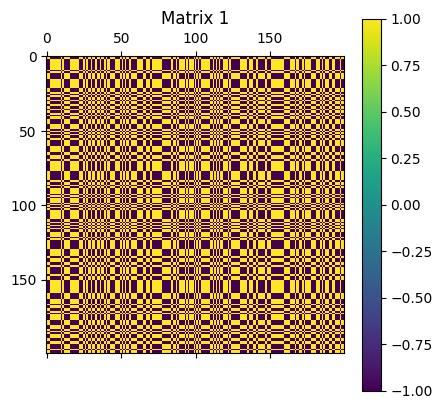

In [13]:
# Index of the matrix you want to display
index = 1  # Change this to the index of the matrix you want to display

# Ensure index is within range
if 0 <= index < len(matrix_list):
    # Select the matrix
    selected_matrix = matrix_list[index]
    # Display the matrix
    plt.matshow(selected_matrix, cmap='viridis')
    plt.colorbar()  # Optional: adds a color bar to the side
    plt.title(f'Matrix {index}')
    plt.show()
else:
    print("Index out of range. Please choose a valid index.")


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Folder containing the CSV files
folder_path = 'corr_matrix'

# List to store eigenvalues arrays
eigenvalues_list = []

# Iterate over each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        # Load the CSV file into a NumPy array
        matrix = np.loadtxt(file_path, delimiter=',')
        # Compute the eigenvalues
        eigenvalues, _ = np.linalg.eig(matrix)
        # Append the eigenvalues to the list
        eigenvalues_list.append(eigenvalues)



In [12]:
eigenvalues_list[2]

array([ 2.00000000e+02+0.00000000e+00j,  2.89614295e-14+0.00000000e+00j,
        1.22942906e-14+0.00000000e+00j, -1.05611477e-14+0.00000000e+00j,
       -8.58986182e-15+0.00000000e+00j,  8.05004113e-15+2.16721073e-15j,
        8.05004113e-15-2.16721073e-15j, -7.22561632e-15+0.00000000e+00j,
        6.30248574e-15+2.91841707e-16j,  6.30248574e-15-2.91841707e-16j,
       -3.16329481e-15+5.13095195e-15j, -3.16329481e-15-5.13095195e-15j,
        5.38556532e-15+2.35257749e-15j,  5.38556532e-15-2.35257749e-15j,
       -6.01225331e-15+8.95988106e-16j, -6.01225331e-15-8.95988106e-16j,
       -3.82433169e-15+4.20585479e-15j, -3.82433169e-15-4.20585479e-15j,
        3.97070483e-15+2.97835754e-15j,  3.97070483e-15-2.97835754e-15j,
       -5.07836278e-15+0.00000000e+00j,  3.23746259e-16+4.61941363e-15j,
        3.23746259e-16-4.61941363e-15j, -1.08469806e-15+4.40054057e-15j,
       -1.08469806e-15-4.40054057e-15j, -3.93803389e-15+2.54686767e-15j,
       -3.93803389e-15-2.54686767e-15j,  1.96732059

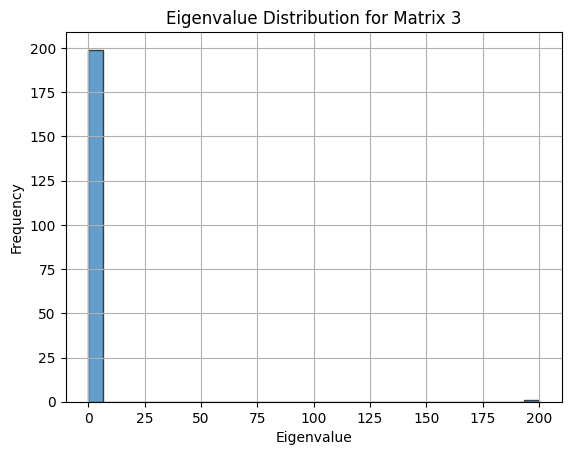

In [10]:
# Index of the matrix you want to visualize
index = 3  # Change this to the index of the matrix you want to analyze

# Ensure index is within range
if 0 <= index < len(eigenvalues_list):
    # Select the eigenvalues
    selected_eigenvalues = eigenvalues_list[index]
    # Plot the histogram of eigenvalues
    plt.hist(selected_eigenvalues, bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Eigenvalue Distribution for Matrix {index}')
    plt.xlabel('Eigenvalue')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
else:
    print("Index out of range. Please choose a valid index.")
